In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/stanislavyatsevich/Desktop/ChurnRate.csv')

In [101]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

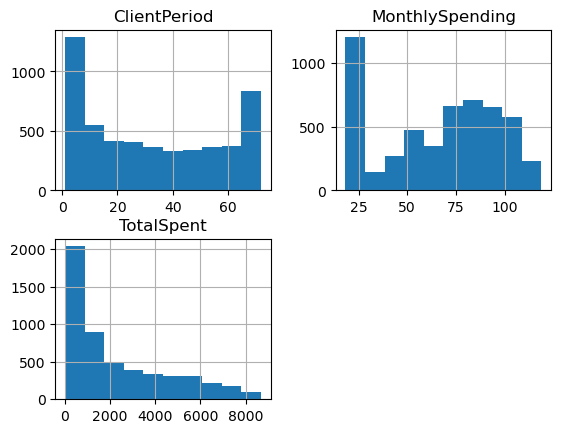

In [103]:
data = data.replace(' ', np.nan)   
data = data.dropna().copy()
data['TotalSpent'] = data['TotalSpent'].astype('float')
data.hist(column=num_cols)
data.isna().sum()

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [105]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,32.452304,64.956770,2291.390461,0.159681,0.262469
std,24.534723,30.177911,2269.014233,0.366345,0.440018
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.500000,401.100000,0.000000,0.000000
50%,29.000000,70.450000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3807.350000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


<Axes: ylabel='Frequency'>

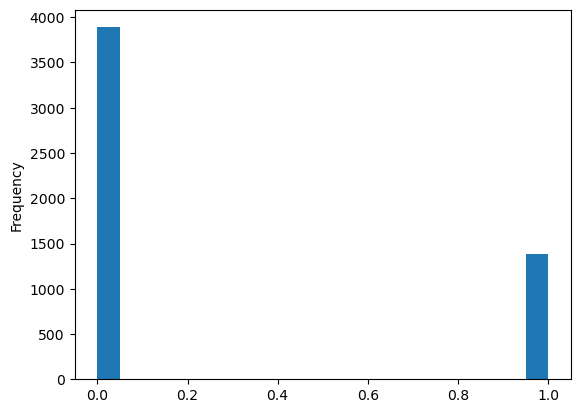

In [106]:
data['Churn'].plot(kind='hist', bins=20)

In [107]:
data[['Churn','IsSeniorCitizen']].groupby(['IsSeniorCitizen']).mean().sort_values(by='Churn', ascending=False)

,Churn
IsSeniorCitizen,
1,0.420428
0,0.232453


In [108]:
data[['Churn','HasPartner']].groupby(['HasPartner']).mean().sort_values(by='Churn', ascending=False)

,Churn
HasPartner,
No,0.325814
Yes,0.195796


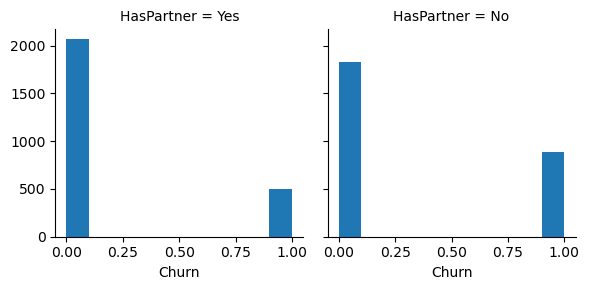

In [109]:
ChurnToHasPartner = sns.FacetGrid(data, col='HasPartner')
ChurnToHasPartner.map(plt.hist, 'Churn', bins=10)

In [110]:
data[['Churn','Sex']].groupby(['Sex']).mean().sort_values(by='Churn', ascending=False)

,Churn
Sex,
Female,0.266209
Male,0.258770


In [111]:
data = data.drop(['Sex'], axis=1)
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [112]:
data[['Churn','HasChild']].groupby(['HasChild']).mean().sort_values(by='Churn', ascending=False)

,Churn
HasChild,
No,0.309576
Yes,0.154039


In [113]:
data[['Churn','HasMultiplePhoneNumbers']].groupby(['HasMultiplePhoneNumbers']).mean().sort_values(by='Churn', ascending=False)

,Churn
HasMultiplePhoneNumbers,
Yes,0.282725
No phone service,0.248555
No,0.247209


In [114]:
data = data.drop(['HasMultiplePhoneNumbers'], axis=1)
data

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,0,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,0,No,No,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,1,Yes,No,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,0,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,No,No,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,0,Yes,No,No,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,0,No,No,Yes,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,0,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [115]:
data[['Churn','HasPhoneService']].groupby(['HasPhoneService']).mean().sort_values(by='Churn', ascending=False)

,Churn
HasPhoneService,
Yes,0.263988
No,0.248555


In [116]:
data = data.drop(['HasPhoneService'], axis=1)
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,0,No,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [117]:
data[['Churn','HasInternetService']].groupby(['HasInternetService']).mean().sort_values(by='Churn', ascending=False)

,Churn
HasInternetService,
Fiber optic,0.410081
DSL,0.190529
No,0.072120


In [118]:
data[['Churn','HasContractPhone']].groupby(['HasContractPhone']).mean().sort_values(by='Churn', ascending=False)

,Churn
HasContractPhone,
Month-to-month,0.421575
One year,0.111008
Two year,0.025943


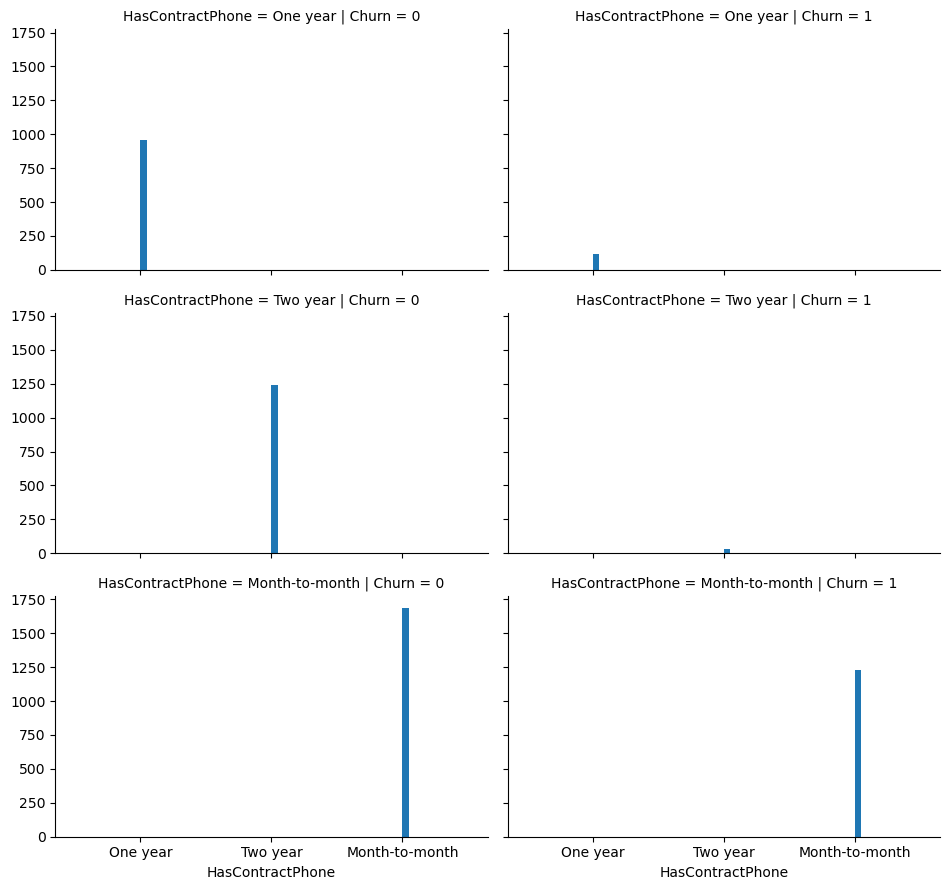

In [119]:
ChurnToHasContractPhone = sns.FacetGrid(data, col='Churn', row='HasContractPhone', aspect=1.6)
ChurnToHasContractPhone.map(plt.hist, 'HasContractPhone', bins=20)

In [120]:
data[['Churn','PaymentMethod']].groupby(['PaymentMethod']).mean().sort_values(by='Churn', ascending=False)

,Churn
PaymentMethod,
Electronic check,0.444569
Mailed check,0.193603
Bank transfer (automatic),0.168539
Credit card (automatic),0.144483


In [121]:
data[['Churn','HasOnlineTV']].groupby(['HasOnlineTV']).mean().sort_values(by='Churn', ascending=False)

,Churn
HasOnlineTV,
No,0.333651
Yes,0.295388
No internet service,0.072120


In [122]:
data = data.drop(['HasOnlineTV'], axis=1)
data

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,0,No,No,Fiber optic,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,1,Yes,No,Fiber optic,No,No,Yes,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,No,No,DSL,No,No,No,Yes,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,0,Yes,No,DSL,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,0,No,No,DSL,No,No,Yes,Yes,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,0,No,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [123]:
data[['Churn','HasMovieSubscription']].groupby(['HasMovieSubscription']).mean().sort_values(by='Churn', ascending=False)

,Churn
HasMovieSubscription,
No,0.339432
Yes,0.289947
No internet service,0.072120


In [126]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [127]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

numeric_data = data[num_cols]
categorial_data = data[cat_cols]
dummy_features = pd.get_dummies(categorial_data)
X = pd.concat([numeric_data, dummy_features], axis=1)

#X_origin = data.iloc[:, :-1] #сохраняем исходник X_origin для последующего бустинга
X_origin = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   
X_test_scaled = scaler.transform(X_test)

In [297]:
LogRegressorCV = LogisticRegressionCV(scoring='accuracy', refit=True)
LogRegressorCV.fit(X_train_scaled, y_train)
y_pred = LogRegressorCV.predict(X_test_scaled)
#round(recall_score(y_test, y_pred) * 100, 2)
round(accuracy_score(y_test, y_pred) * 100, 2)

81.04

81.04

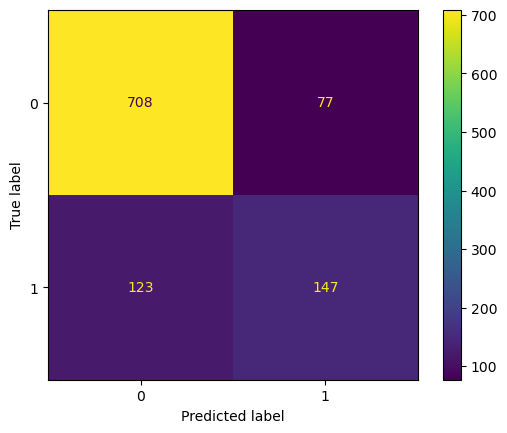

In [300]:
LogRegressor = LogisticRegression()
LogRegressor.fit(X_train_scaled, y_train)
y_pred_LR = LogRegressor.predict(X_test_scaled)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_LR)).plot();
round(accuracy_score(y_test, y_pred) * 100, 2)

In [294]:
import catboost
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin, y, test_size=0.2, random_state=42)
categorical_indices = np.array([i for i in range(3, 15)])

boosting_model = catboost.CatBoostClassifier(n_estimators=500, max_depth=2, learning_rate=0.05, cat_features=categorical_indices)
boosting_model.fit(X_train_origin, y_train)
y_pred = boosting_model.predict(X_test_origin)
#round(roc_auc_score(y_test, y_pred) * 100, 2)
round(accuracy_score(y_test, y_pred) * 100, 2)

0:	learn: 0.6692794	total: 4.66ms	remaining: 2.32s
1:	learn: 0.6481082	total: 7.94ms	remaining: 1.98s
2:	learn: 0.6300069	total: 11.3ms	remaining: 1.87s
3:	learn: 0.6090610	total: 14.6ms	remaining: 1.81s
4:	learn: 0.5908170	total: 16.9ms	remaining: 1.67s
5:	learn: 0.5741918	total: 19.5ms	remaining: 1.61s
6:	learn: 0.5609808	total: 22.5ms	remaining: 1.58s
7:	learn: 0.5492253	total: 25.6ms	remaining: 1.57s
8:	learn: 0.5390117	total: 28.2ms	remaining: 1.54s
9:	learn: 0.5289947	total: 31.9ms	remaining: 1.56s
10:	learn: 0.5206416	total: 34.6ms	remaining: 1.54s
11:	learn: 0.5136296	total: 37.2ms	remaining: 1.51s
12:	learn: 0.5060742	total: 39.5ms	remaining: 1.48s
13:	learn: 0.4993617	total: 42.8ms	remaining: 1.49s
14:	learn: 0.4930909	total: 45ms	remaining: 1.45s
15:	learn: 0.4883838	total: 47.3ms	remaining: 1.43s
16:	learn: 0.4837813	total: 50.4ms	remaining: 1.43s
17:	learn: 0.4791669	total: 54.9ms	remaining: 1.47s
18:	learn: 0.4741610	total: 57.2ms	remaining: 1.45s
19:	learn: 0.4697546	tot

79.62

In [271]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(3)
KNN.fit(X_train_scaled, y_train)
y_pred = KNN.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

76.3

In [270]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
y_pred = RF.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

78.77

In [269]:
from scipy.stats import randint
params_RF = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 5)
}
RF_random = RandomizedSearchCV(RF, params_RF, n_iter=5, cv=5)
RF_random.fit(X_train_scaled, y_train)
y_pred = RF_random.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

80.19

In [292]:
import xgboost as xgb
XGB = xgb.XGBClassifier(n_estimators=1000, max_depth=2, learning_rate=0.004, objective='binary:logistic')
XGB.fit(X_train_scaled, y_train)
y_pred = XGB.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

80.76

In [293]:
DT = DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
y_pred = DT.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

71.37

In [263]:
from sklearn.svm import SVC, LinearSVC
SVCRegressor = SVC()
SVCRegressor.fit(X_train_scaled, y_train)
y_pred = SVCRegressor.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

79.62

In [262]:
LinearSVCRegressor = LinearSVC()
LinearSVCRegressor.fit(X_train_scaled, y_train)
y_pred = LinearSVCRegressor.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

/Users/stanislavyatsevich/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stanislavyatsevich/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80.57

81.04

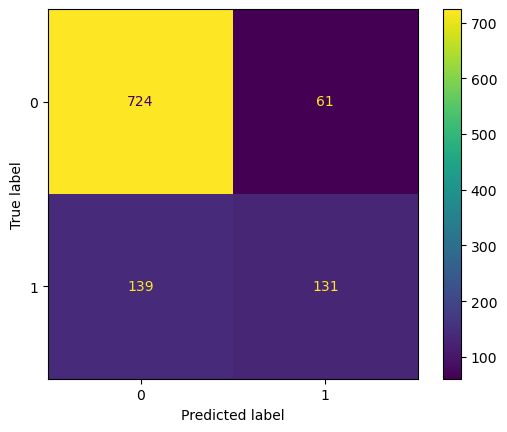

In [298]:
from sklearn.ensemble import GradientBoostingClassifier
GradBoostClf = GradientBoostingClassifier(max_depth=2, n_estimators=1400, random_state=42, learning_rate=0.0028)
GradBoostClf.fit(X_train_scaled, y_train)
y_pred_GBC = GradBoostClf.predict(X_test_scaled)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_GBC)).plot();
round(accuracy_score(y_test, y_pred) * 100, 2)

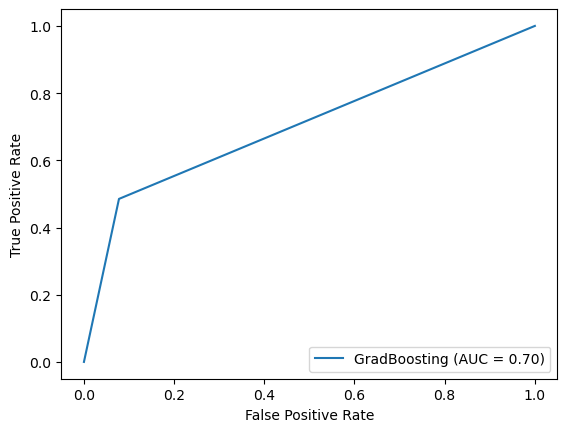

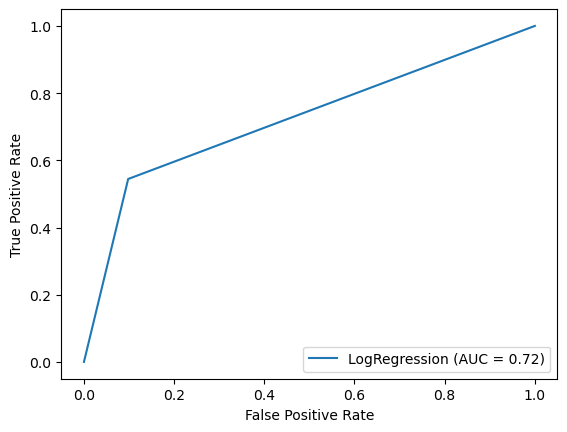

In [306]:
from sklearn import metrics
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred_GBC)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred_LR)

roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
display1 = metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='GradBoosting')
display2 = metrics.RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='LogRegression')
display1.plot()
display2.plot()
plt.show()